# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

An open EEG dataset released in 2019 by Cao et al. [38] was used in our study. The dataset contains 62 EEG data sets
collected from 27 subjects (aged between 22 and 28) during 2005–2012. The participants were students or staff from the National
Chiao Tung University.
A sustained-attention driving task was implemented in a simulated VR driving simulator. The participants were asked to
drive and keep the car in the center of a lane. In order to simulate small changes in road curvature or stones on the way that
makes car drift, lane-departure events were randomly introduced which drifted the car to the left or the right from the central
lane. The participants were asked to keep their attention during the whole experiment and respond immediately to the lanedeparture events by steering the car back to center of the lane. Each lane-departure event was defined as a “trial”, which includes
a baseline period, deviation onset (when the car starts to drift), response onset (when the participant starts to turn the wheel) and
response offset (when the car returns to the central lane). The unexciting and monotonous task could easily make participants
feel drowsy.
The EEG signals were sampled at a rate of 500 Hz during the whole experiment by a wired EEG cap with 30 EEG electrodes
and 2 reference electrodes, which were placed according to a modified international 10–20 system. Both the raw and the
processed datasets are available online.

# Importing Libraires 

In [2]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Datset

Number of subjects: 11
Number of samples: 2022
Number of EEG channels: 30
Number of timepoints per sample: 384
Unique labels: [0 1]
Label counts: [1011 1011]


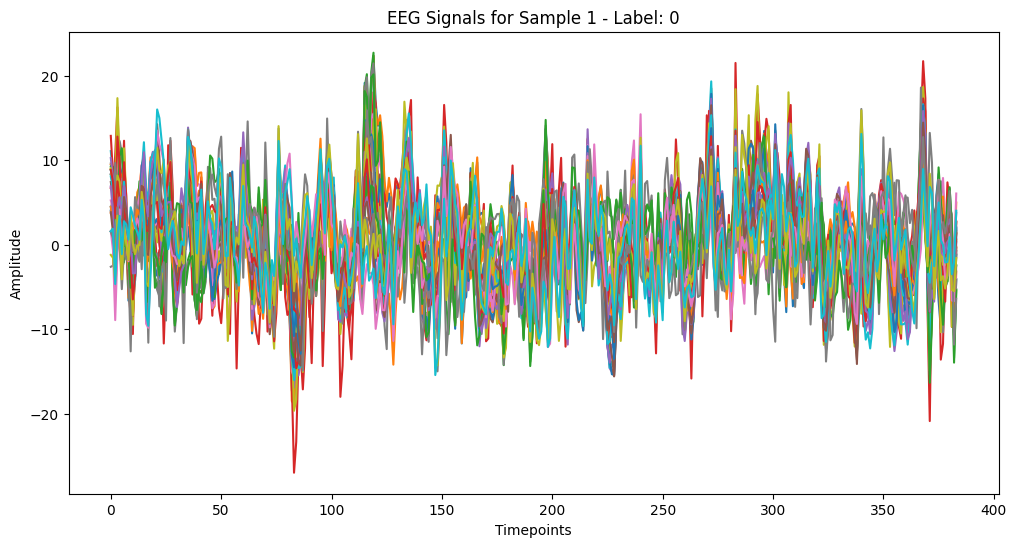

In [5]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the MATLAB file
mat_data = scipy.io.loadmat('EEG driver drowsiness dataset.mat')

# Access the EEG data and other relevant information
eeg_data = mat_data['EEGsample']
subject_indexes = mat_data['subindex'].flatten()
labels = mat_data['substate'].flatten()

# Get the dimensions of the EEG data
num_samples, num_channels, num_timepoints = eeg_data.shape

# Display basic information about the dataset
print("Number of subjects:", len(np.unique(subject_indexes)))
print("Number of samples:", num_samples)
print("Number of EEG channels:", num_channels)
print("Number of timepoints per sample:", num_timepoints)

# Display information about the labels
unique_labels, label_counts = np.unique(labels, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts)

# Inspect a few samples to understand the data format
sample_index = 0

# Plot EEG signals for a specific sample
plt.figure(figsize=(12, 6))
for channel_index in range(num_channels):
    plt.plot(eeg_data[sample_index, channel_index, :])

plt.title('EEG Signals for Sample {} - Label: {}'.format(sample_index + 1, labels[sample_index]))
plt.xlabel('Timepoints')
plt.ylabel('Amplitude')
plt.show()


In [6]:
import numpy as np

# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_data, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_data, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_data, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_data, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Display basic statistics for each EEG channel
for channel_index in range(num_channels):
    print("Channel {}: Mean: {:.4f}, Std: {:.4f}, Min: {:.4f}, Max: {:.4f}".format(
        channel_index + 1, mean_values[channel_index], std_values[channel_index],
        min_values[channel_index], max_values[channel_index]
    ))

# Check for missing values
missing_values = np.isnan(eeg_data).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

# Handle missing values (if necessary)
# For example, you can replace missing values with the mean of each channel:
eeg_data_no_missing = np.nan_to_num(eeg_data, nan=np.nanmean(eeg_data))

# You can then recompute statistics on the data without missing values


Channel 1: Mean: -0.0216, Std: 14.6210, Min: -573.2365, Max: 871.9078
Channel 2: Mean: -0.0408, Std: 14.9052, Min: -1299.3223, Max: 911.1531
Channel 3: Mean: -0.0046, Std: 9.6717, Min: -208.1605, Max: 243.2860
Channel 4: Mean: -0.0555, Std: 23.2757, Min: -1302.3108, Max: 1795.5439
Channel 5: Mean: -0.0682, Std: 10.7254, Min: -259.1864, Max: 157.8684
Channel 6: Mean: -0.0663, Std: 22.3244, Min: -1914.6017, Max: 1294.2410
Channel 7: Mean: -0.0535, Std: 11.2602, Min: -496.5066, Max: 754.2102
Channel 8: Mean: -0.0116, Std: 8.9256, Min: -257.1262, Max: 178.2628
Channel 9: Mean: -0.0536, Std: 10.5208, Min: -264.4460, Max: 358.2625
Channel 10: Mean: -0.0603, Std: 11.0738, Min: -170.1104, Max: 172.7116
Channel 11: Mean: -0.0571, Std: 10.8091, Min: -220.8742, Max: 281.4221
Channel 12: Mean: -0.0451, Std: 9.3398, Min: -249.3489, Max: 203.9866
Channel 13: Mean: 0.1597, Std: 88.7564, Min: -3195.4259, Max: 3430.9080
Channel 14: Mean: -0.0544, Std: 10.0442, Min: -259.9218, Max: 369.9024
Channel 15: 

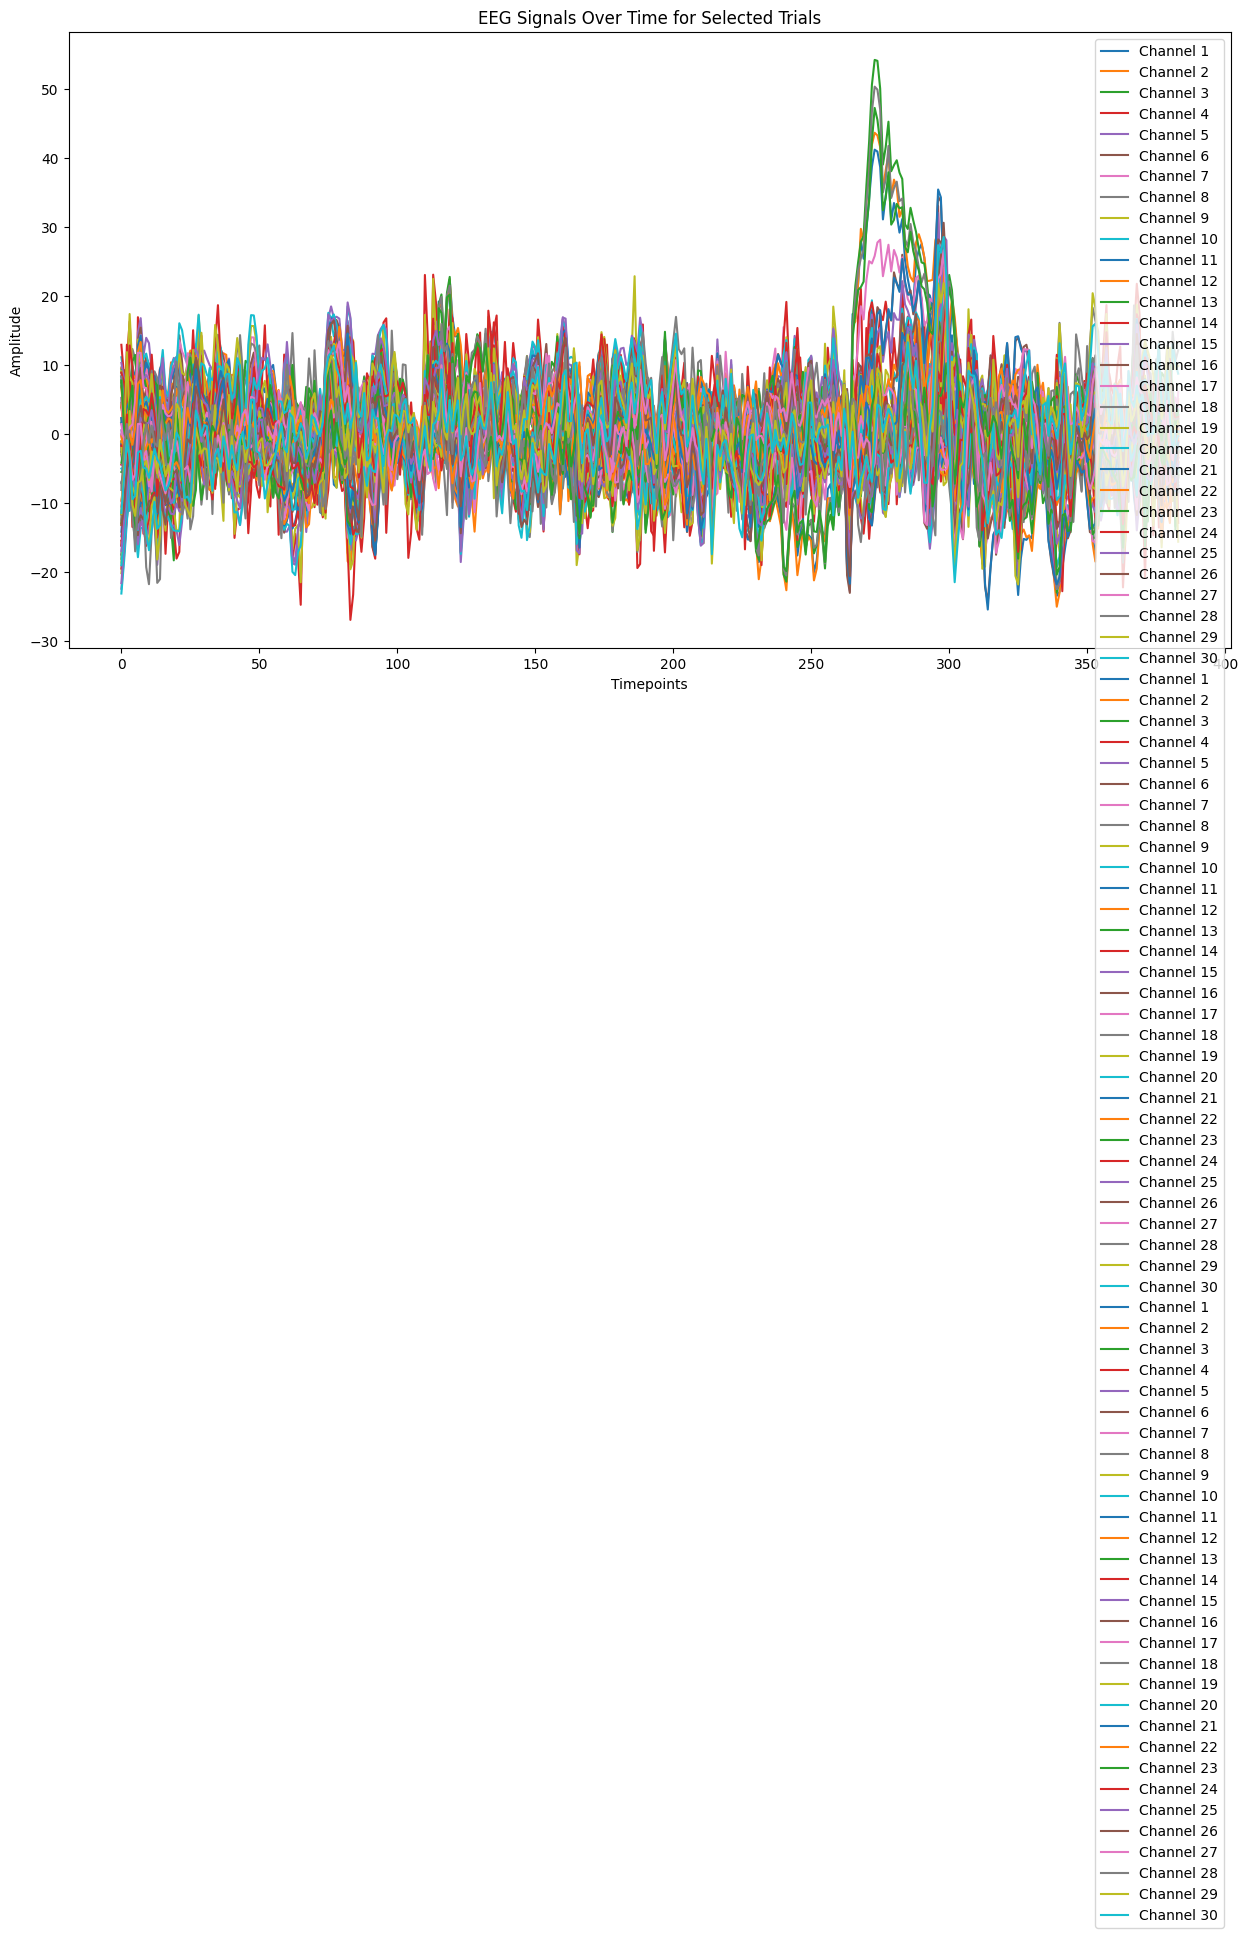

C:\Users\nafem\AppData\Local\Temp\ipykernel_368\1428805537.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(range(num_channels), eeg_data[:, :, timepoint_to_visualize].mean(axis=0), cmap='viridis', c='blue')


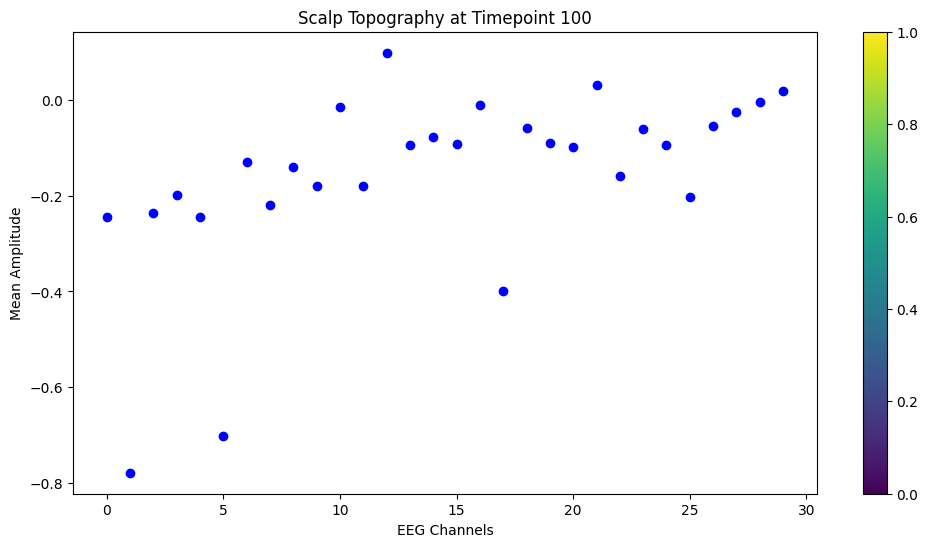

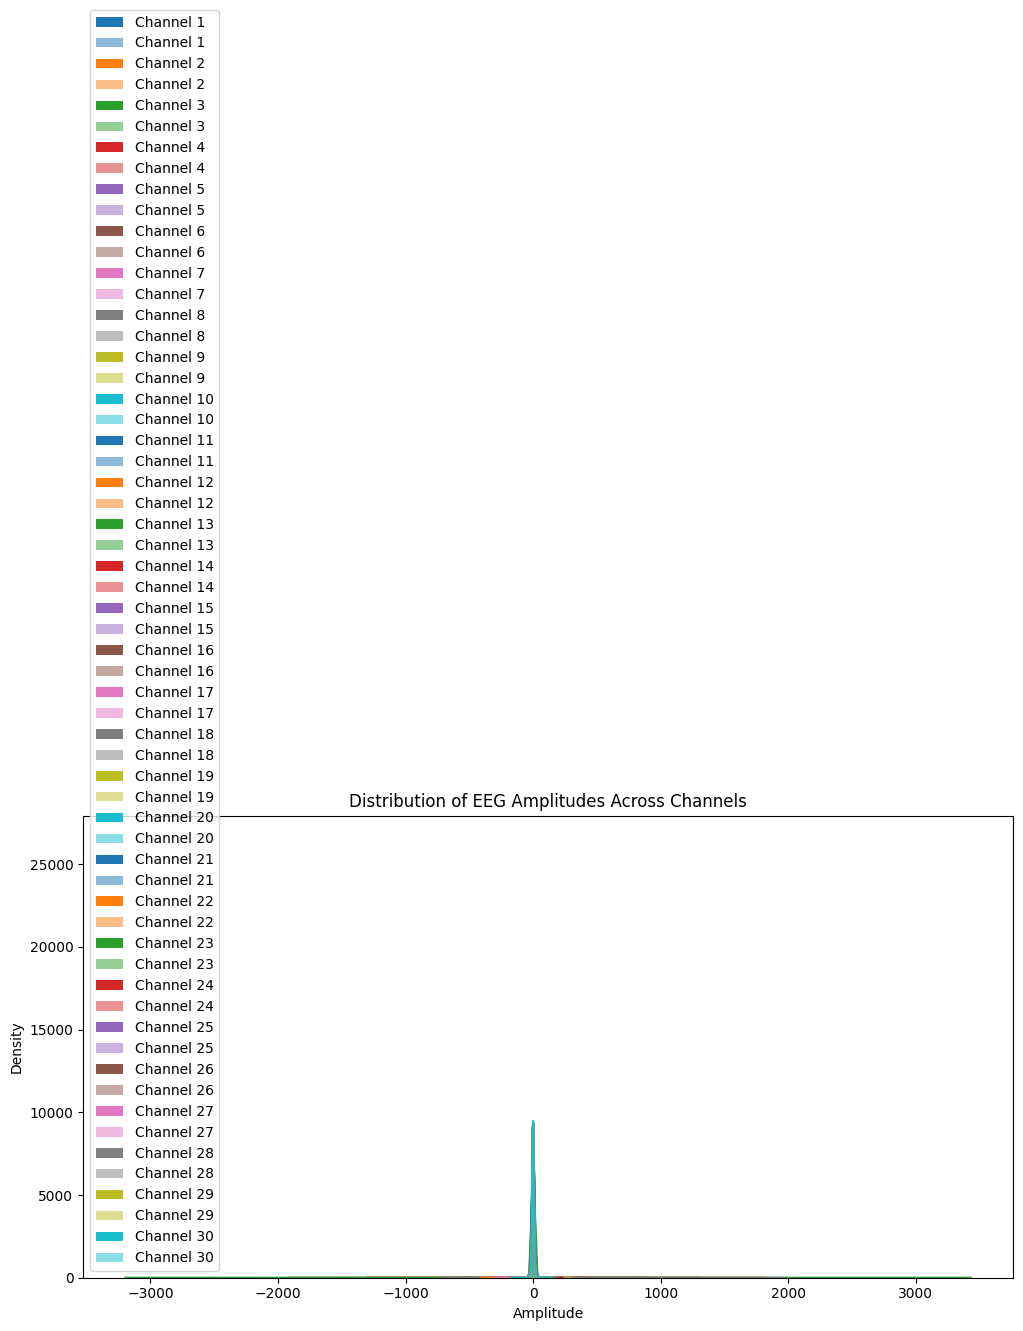

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a few trials for visualization
trials_to_visualize = [0, 1, 2]

# Plot EEG signals over time for selected trials
plt.figure(figsize=(15, 8))
for trial_index in trials_to_visualize:
    for channel_index in range(num_channels):
        plt.plot(eeg_data[trial_index, channel_index, :], label=f'Channel {channel_index + 1}')

plt.title('EEG Signals Over Time for Selected Trials')
plt.xlabel('Timepoints')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Generate scalp topographies for a specific timepoint
timepoint_to_visualize = 100  # Adjust as needed

plt.figure(figsize=(12, 6))
plt.scatter(range(num_channels), eeg_data[:, :, timepoint_to_visualize].mean(axis=0), cmap='viridis', c='blue')
plt.title('Scalp Topography at Timepoint {}'.format(timepoint_to_visualize))
plt.xlabel('EEG Channels')
plt.ylabel('Mean Amplitude')
plt.colorbar()
plt.show()

# Create histograms or kernel density plots for EEG amplitudes
plt.figure(figsize=(12, 6))
for channel_index in range(num_channels):
    sns.histplot(eeg_data[:, channel_index, :].flatten(), kde=True, label=f'Channel {channel_index + 1}')

plt.title('Distribution of EEG Amplitudes Across Channels')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.legend()
plt.show()


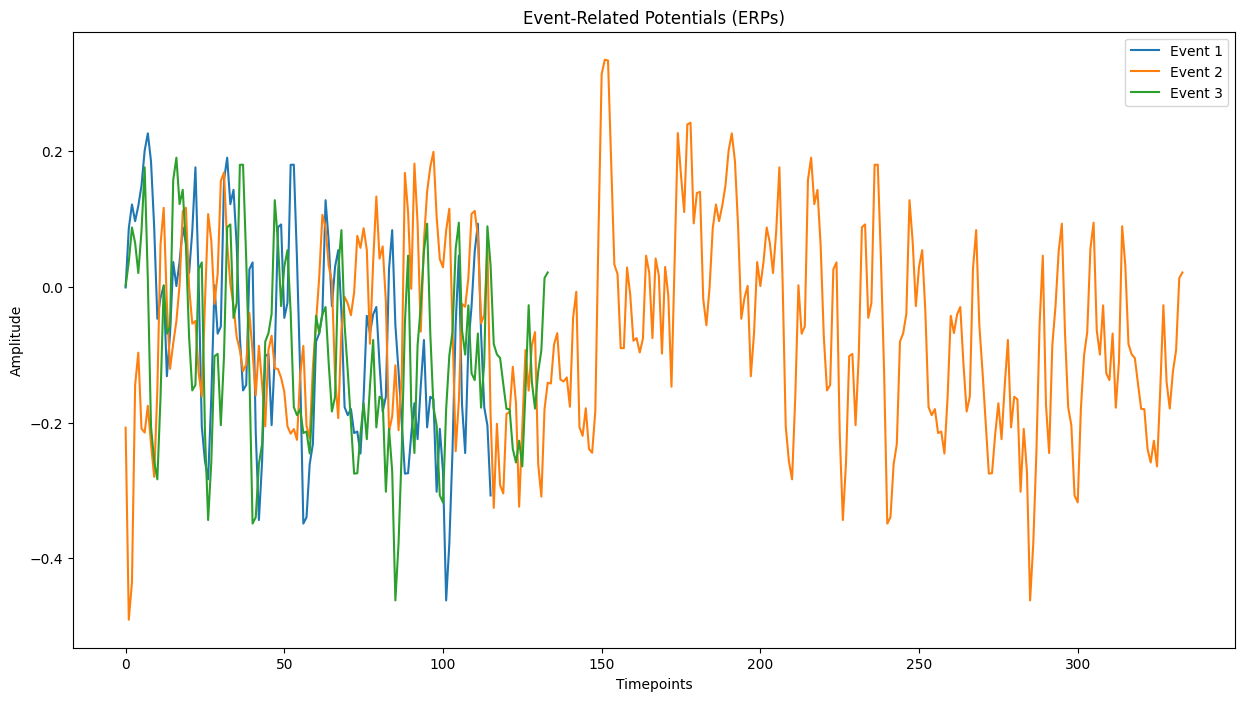

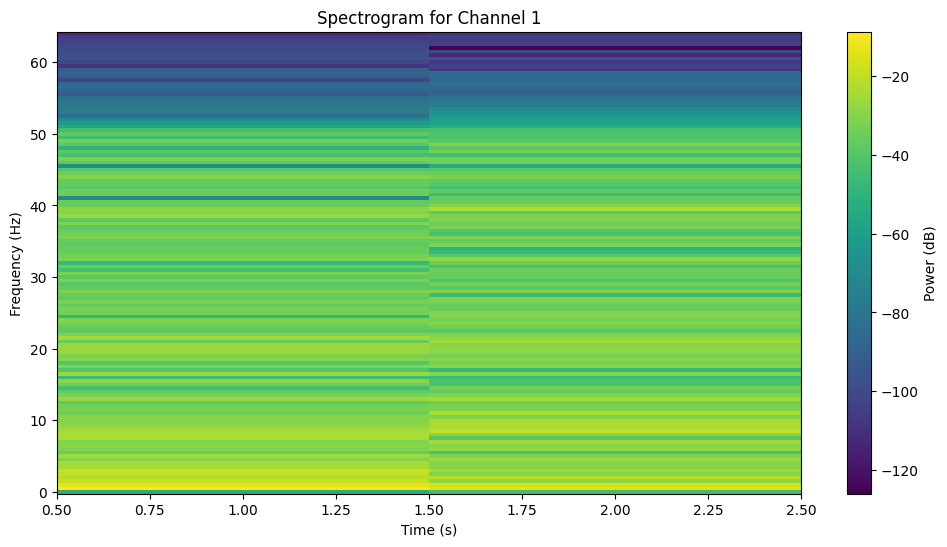

In [8]:
from scipy.signal import spectrogram

# Assuming you have the event information available (e.g., onset times)
# For demonstration purposes, let's create a simple artificial event array
event_onset_times = [100, 300, 500]  # Adjust as needed

# Segment the EEG data based on events
segment_duration = 500  # Time window around each event (adjust as needed)
eeg_segments = []
for onset_time in event_onset_times:
    segment_start = onset_time - segment_duration // 2
    segment_end = onset_time + segment_duration // 2
    eeg_segments.append(eeg_data[:, :, segment_start:segment_end])

# Plot ERP waveforms for each event
plt.figure(figsize=(15, 8))
for i, segment in enumerate(eeg_segments):
    average_segment = np.mean(segment, axis=0).mean(axis=0)  # Average across subjects and channels
    plt.plot(average_segment, label=f'Event {i + 1}')

plt.title('Event-Related Potentials (ERPs)')
plt.xlabel('Timepoints')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Calculate and visualize spectrogram for a specific channel
channel_to_visualize = 0  # Adjust as needed

frequencies, times, spectrogram_data = spectrogram(
    eeg_data[:, channel_to_visualize, :].mean(axis=0),
    fs=128,  # Assuming a sampling rate of 128 Hz, adjust as needed
    nperseg=256,  # Adjust the window size as needed
    noverlap=128  # Adjust the overlap as needed
)

plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto', cmap='viridis')
plt.title('Spectrogram for Channel {}'.format(channel_to_visualize + 1))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.show()


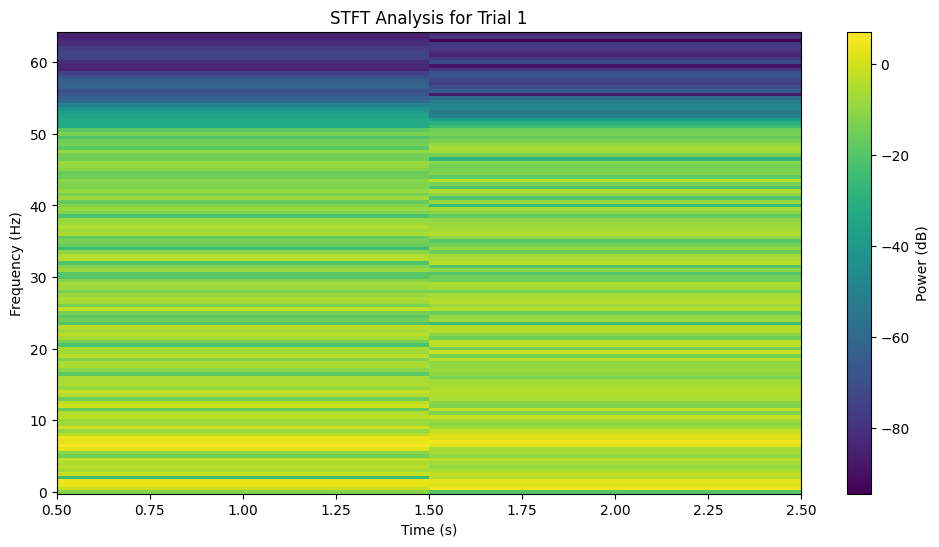

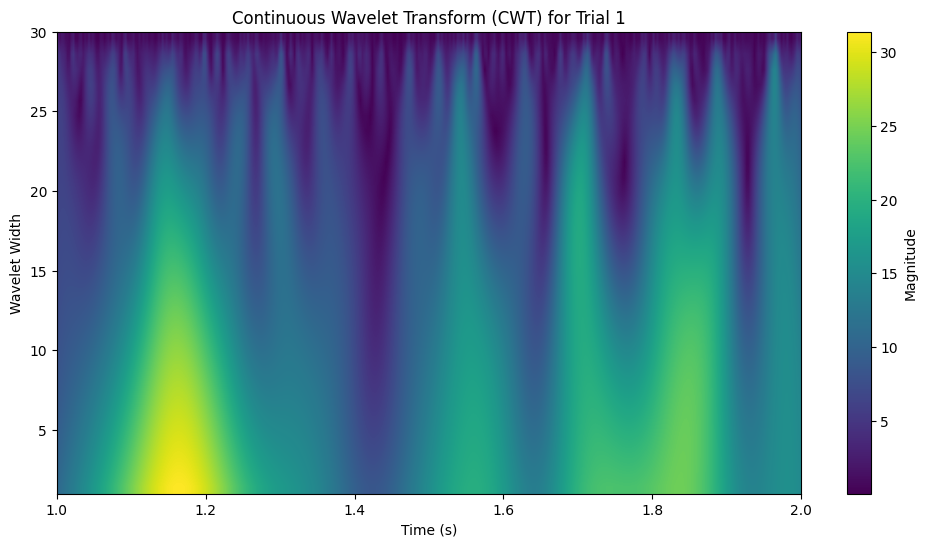

In [9]:
from scipy.signal import spectrogram, cwt, morlet

# Choose a specific trial for analysis
trial_index = 0  # Adjust as needed

# Time-Frequency Analysis using Short-Time Fourier Transform (STFT)
frequencies, times, stft_data = spectrogram(
    eeg_data[trial_index, :, :].mean(axis=0),
    fs=128,  # Assuming a sampling rate of 128 Hz, adjust as needed
    nperseg=256,  # Adjust the window size as needed
    noverlap=128  # Adjust the overlap as needed
)

# Visualize the STFT
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(stft_data), shading='auto', cmap='viridis')
plt.title('STFT Analysis for Trial {}'.format(trial_index + 1))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.show()

# Time-Frequency Analysis using Continuous Wavelet Transform (CWT)
wavelet_widths = np.arange(1, 31)  # Adjust the range of wavelet widths as needed
cwt_data = cwt(
    eeg_data[trial_index, :, :].mean(axis=0),
    morlet, wavelet_widths
)

# Visualize the CWT
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwt_data), extent=[times.min(), times.max(), wavelet_widths.min(), wavelet_widths.max()],
           aspect='auto', cmap='viridis', interpolation='bilinear')
plt.title('Continuous Wavelet Transform (CWT) for Trial {}'.format(trial_index + 1))
plt.xlabel('Time (s)')
plt.ylabel('Wavelet Width')
plt.colorbar(label='Magnitude')
plt.show()


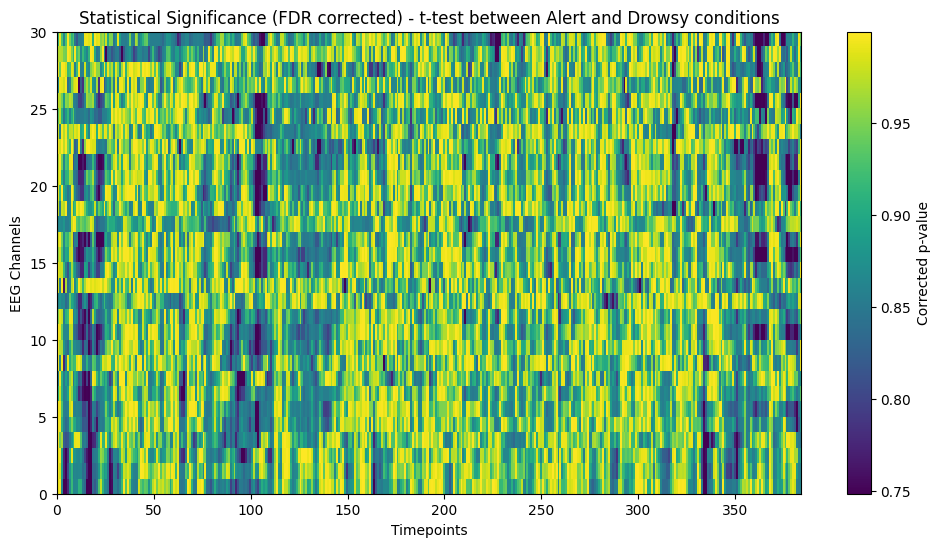

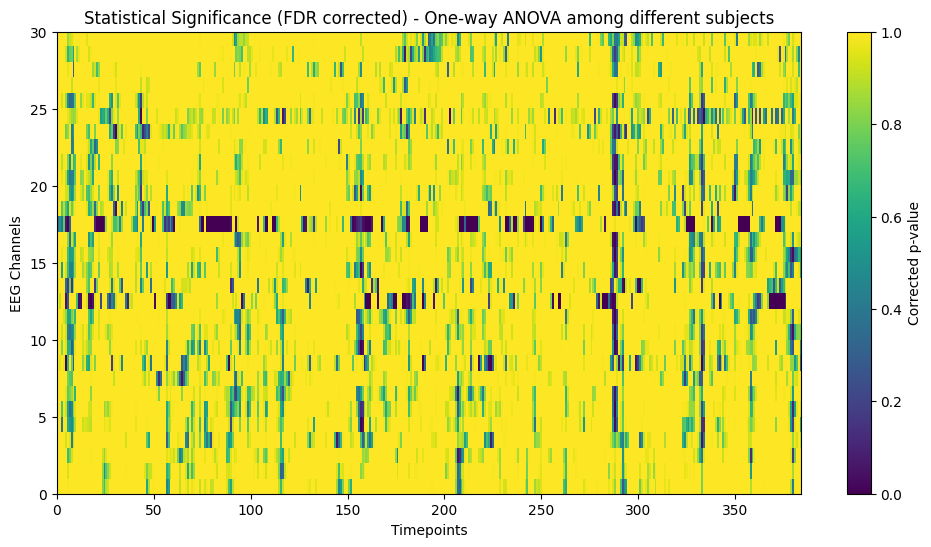

In [15]:
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multitest import multipletests

# Assume you have two conditions (e.g., alert and drowsy) for comparison
condition_alert = eeg_data[labels == 0]
condition_drowsy = eeg_data[labels == 1]

# Example: t-test for each channel and timepoint between conditions
p_values_ttest = np.zeros((num_channels, num_timepoints))
for channel_index in range(num_channels):
    for timepoint_index in range(num_timepoints):
        _, p_value = ttest_ind(condition_alert[:, channel_index, timepoint_index],
                               condition_drowsy[:, channel_index, timepoint_index])
        p_values_ttest[channel_index, timepoint_index] = p_value

# Correct for multiple comparisons using the False Discovery Rate (FDR) correction
reject, p_values_corrected, _, _ = multipletests(p_values_ttest.flatten(), method='fdr_bh')
p_values_corrected = p_values_corrected.reshape((num_channels, num_timepoints))

# Visualize corrected p-values
plt.figure(figsize=(12, 6))
plt.imshow(p_values_corrected, cmap='viridis', extent=[0, num_timepoints, 0, num_channels], aspect='auto',
           interpolation='nearest')
plt.colorbar(label='Corrected p-value')
plt.title('Statistical Significance (FDR corrected) - t-test between Alert and Drowsy conditions')
plt.xlabel('Timepoints')
plt.ylabel('EEG Channels')
plt.show()

# Example: One-way ANOVA for each channel and timepoint among different subjects
_, p_values_anova = f_oneway(*[eeg_data[subject_indexes == i, :, :] for i in np.unique(subject_indexes)])

# Correct for multiple comparisons using the False Discovery Rate (FDR) correction
reject_anova, p_values_corrected_anova, _, _ = multipletests(p_values_anova.flatten(), method='fdr_bh')
p_values_corrected_anova = p_values_corrected_anova.reshape((num_channels, num_timepoints))

# Visualize corrected p-values for ANOVA
plt.figure(figsize=(12, 6))
plt.imshow(p_values_corrected_anova, cmap='viridis', extent=[0, num_timepoints, 0, num_channels], aspect='auto',
           interpolation='nearest')
plt.colorbar(label='Corrected p-value')
plt.title('Statistical Significance (FDR corrected) - One-way ANOVA among different subjects')
plt.xlabel('Timepoints')
plt.ylabel('EEG Channels')
plt.show()


C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


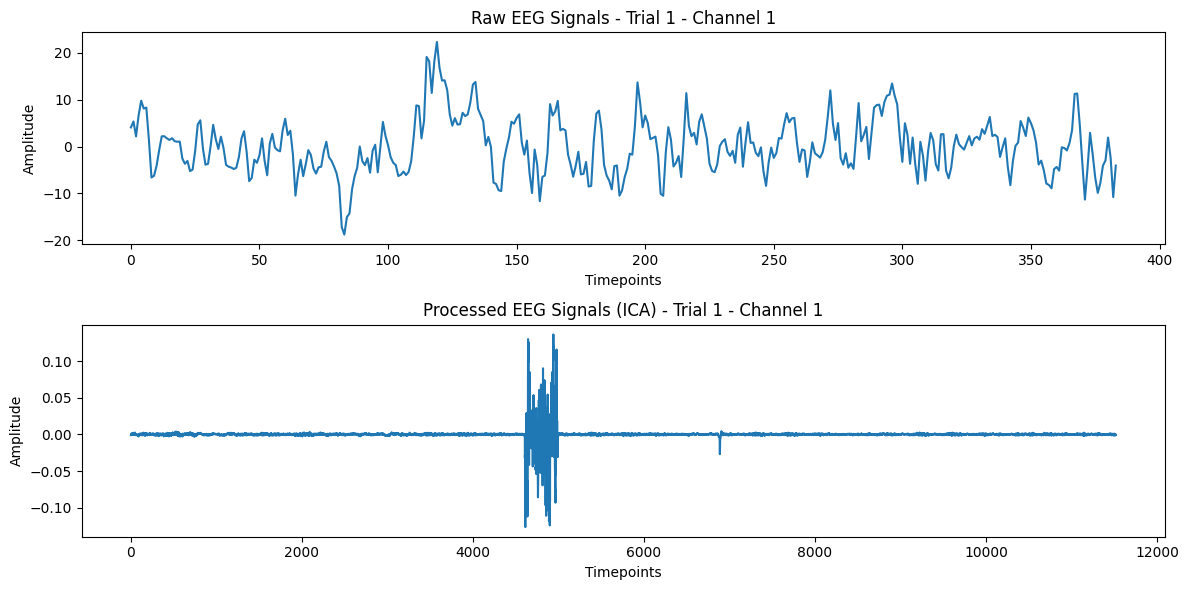

In [18]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Assuming 'eeg_data' is the original EEG data
# Flatten the data for ICA (subjects, channels, timepoints) -> (subjects, features)
eeg_data_flattened = eeg_data.reshape((eeg_data.shape[0], -1))

# Apply ICA
ica = FastICA(n_components=num_channels, random_state=42)
eeg_data_ica = ica.fit_transform(eeg_data_flattened.T).T

# Compare raw and processed EEG datasets for a specific trial and channel
trial_index = 0  # Adjust as needed
channel_index = 0  # Adjust as needed

plt.figure(figsize=(12, 6))

# Plot raw EEG signals
plt.subplot(2, 1, 1)
plt.plot(eeg_data[trial_index, channel_index, :])
plt.title('Raw EEG Signals - Trial {} - Channel {}'.format(trial_index + 1, channel_index + 1))
plt.xlabel('Timepoints')
plt.ylabel('Amplitude')

# Plot processed EEG signals after ICA
plt.subplot(2, 1, 2)
plt.plot(eeg_data_ica[trial_index, :])  # Corrected indexing
plt.title('Processed EEG Signals (ICA) - Trial {} - Channel {}'.format(trial_index + 1, channel_index + 1))
plt.xlabel('Timepoints')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


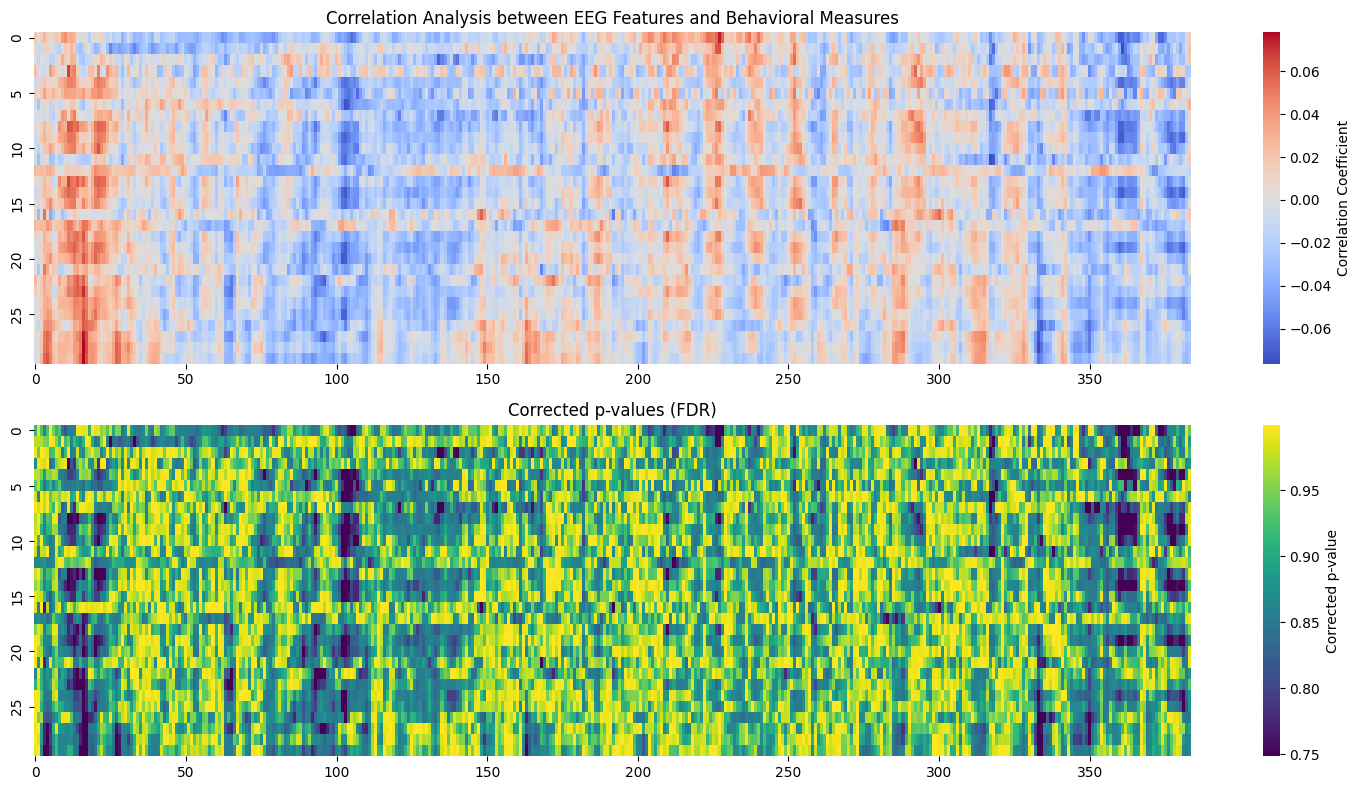

In [24]:
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have behavioral measures (e.g., substate labels) available
# Replace 'your_matlab_data' with the actual variable name representing your Matlab data
matlab_data = mat_data  # Replace with the actual variable name in your dataset

# Extract relevant variables from the Matlab data
eeg_data = matlab_data['EEGsample']
substate = matlab_data['substate']

# Get dimensions of the EEG data
num_subjects, num_channels, num_timepoints = eeg_data.shape

# Example: Correlation analysis between EEG features and behavioral measures
correlations = np.zeros((num_channels, num_timepoints))
p_values = np.zeros((num_channels, num_timepoints))

for channel_index in range(num_channels):
    for timepoint_index in range(num_timepoints):
        # Extract EEG features for the correlation analysis
        eeg_features = eeg_data[:, channel_index, timepoint_index]

        # Perform Pearson correlation
        correlation_coefficient, p_value = pearsonr(eeg_features, substate)
        correlations[channel_index, timepoint_index] = correlation_coefficient
        p_values[channel_index, timepoint_index] = p_value

# Correct for multiple comparisons using the False Discovery Rate (FDR) correction
reject_corr, p_values_corr_corrected, _, _ = multipletests(p_values.flatten(), method='fdr_bh')
p_values_corr_corrected = p_values_corr_corrected.reshape((num_channels, num_timepoints))

# Visualize the correlations and corrected p-values
plt.figure(figsize=(15, 8))

# Plot correlations
plt.subplot(2, 1, 1)
sns.heatmap(correlations, cmap='coolwarm', xticklabels=50, yticklabels=5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Analysis between EEG Features and Behavioral Measures')

# Plot corrected p-values
plt.subplot(2, 1, 2)
sns.heatmap(p_values_corr_corrected, cmap='viridis', xticklabels=50, yticklabels=5, cbar_kws={'label': 'Corrected p-value'})
plt.title('Corrected p-values (FDR)')

plt.tight_layout()
plt.show()


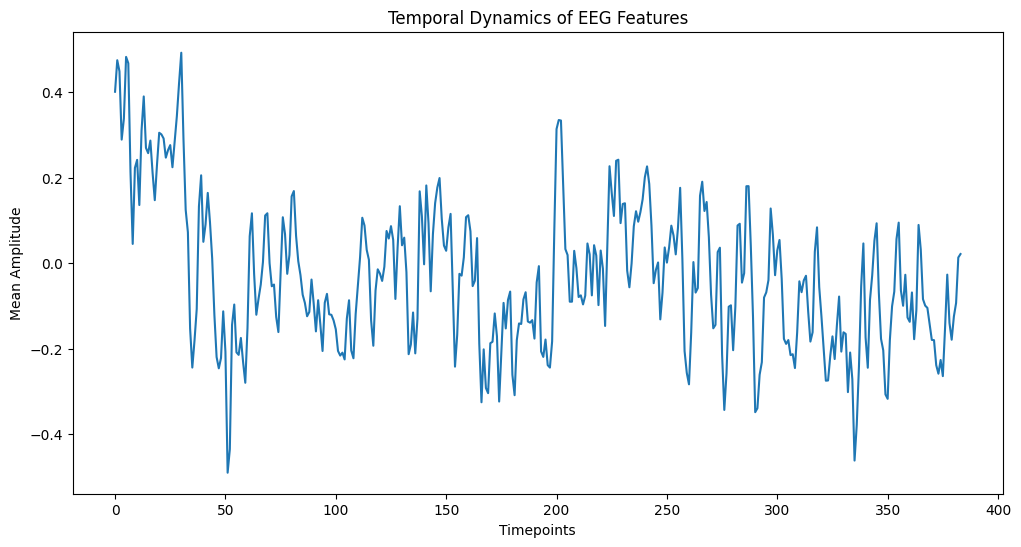

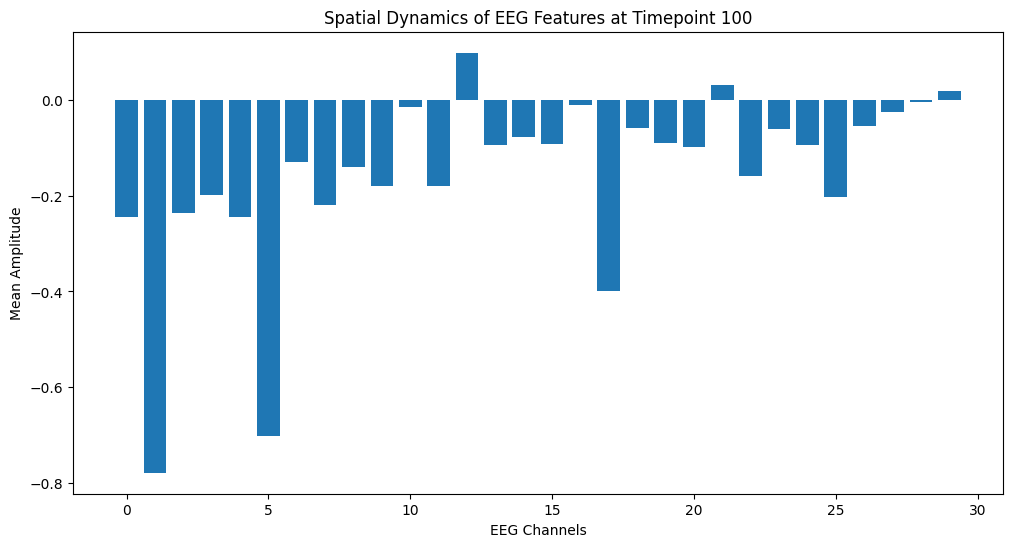

C:\Users\nafem\AppData\Local\Temp\ipykernel_368\3233158444.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(range(num_channels), eeg_data[:, :, timepoint_to_visualize].mean(axis=0), cmap='viridis', c='blue')


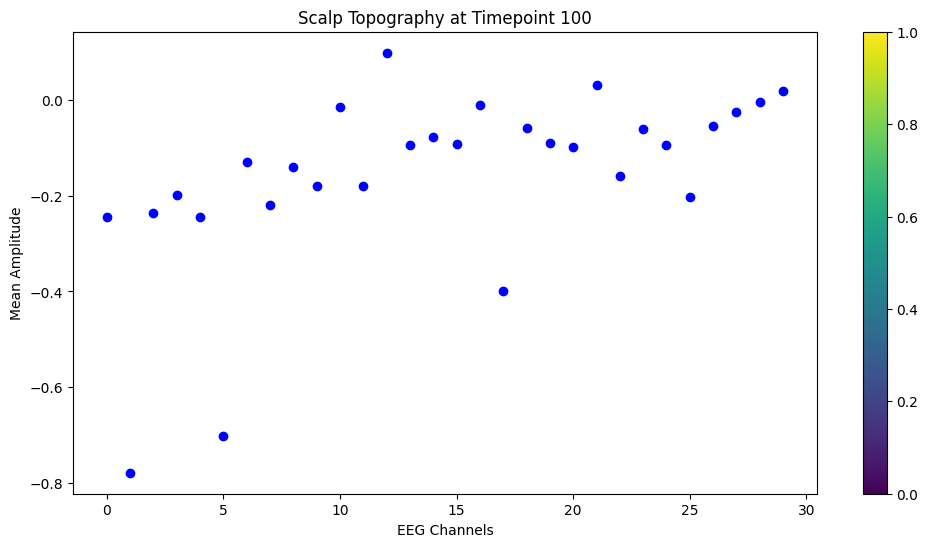

In [11]:
# Temporal Dynamics: Analyzing EEG features over time
# Assuming you want to analyze the mean amplitude across all channels
mean_amplitude_over_time = np.mean(eeg_data.mean(axis=1), axis=0)

# Plotting temporal dynamics
plt.figure(figsize=(12, 6))
plt.plot(mean_amplitude_over_time)
plt.title('Temporal Dynamics of EEG Features')
plt.xlabel('Timepoints')
plt.ylabel('Mean Amplitude')
plt.show()

# Spatial Dynamics: Examining brain activity across electrode locations
# Visualizing mean amplitude across channels at a specific timepoint
timepoint_to_visualize = 100  # Adjust as needed

plt.figure(figsize=(12, 6))
plt.bar(range(num_channels), eeg_data[:, :, timepoint_to_visualize].mean(axis=0))
plt.title('Spatial Dynamics of EEG Features at Timepoint {}'.format(timepoint_to_visualize))
plt.xlabel('EEG Channels')
plt.ylabel('Mean Amplitude')
plt.show()

# Alternatively, visualize scalp topography at a specific timepoint
plt.figure(figsize=(12, 6))
plt.scatter(range(num_channels), eeg_data[:, :, timepoint_to_visualize].mean(axis=0), cmap='viridis', c='blue')
plt.title('Scalp Topography at Timepoint {}'.format(timepoint_to_visualize))
plt.xlabel('EEG Channels')
plt.ylabel('Mean Amplitude')
plt.colorbar()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume you have EEG features and corresponding labels (e.g., alert: 0, drowsy: 1)
eeg_features = eeg_data.mean(axis=1)  # Use mean across channels as features for simplicity
labels = mat_data['substate'].flatten()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(eeg_features, labels, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier (you can choose a different classifier based on your needs)
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Display classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 68.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64       195
           1       0.67      0.77      0.72       210

    accuracy                           0.68       405
   macro avg       0.69      0.68      0.68       405
weighted avg       0.68      0.68      0.68       405

